# Example 1: Bootstrap CI for the MEAN of an exponential distribution

In [1]:

def bootstrap_ci(data, stat_func, n_boot=2000, alpha=0.05):
    """
    Compute a non-parametric bootstrap CI for a statistic.
    data      : 1D array of observations
    stat_func : function to compute the statistic (e.g., np.mean)
    n_boot    : number of bootstrap replicates
    alpha     : significance level for (1-alpha) CI
    """
    boots = []
    n = len(data)
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)  # resample with replacement
        boots.append(stat_func(sample))
    lower = np.percentile(boots, 100 * alpha/2)
    upper = np.percentile(boots, 100 * (1 - alpha/2))
    return lower, upper

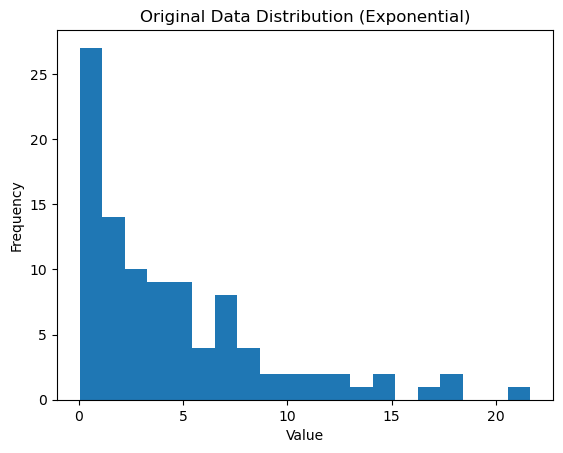

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------
# 1. Simulate a skewed dataset (Exponential)
# -----------------------------------------------
np.random.seed(42)  
data = np.random.exponential(scale=5, size=100)

# Plot original data distribution
plt.figure()
plt.hist(data, bins=20)
plt.title("Original Data Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()




In [3]:
np.mean(data)

4.5737401951943575

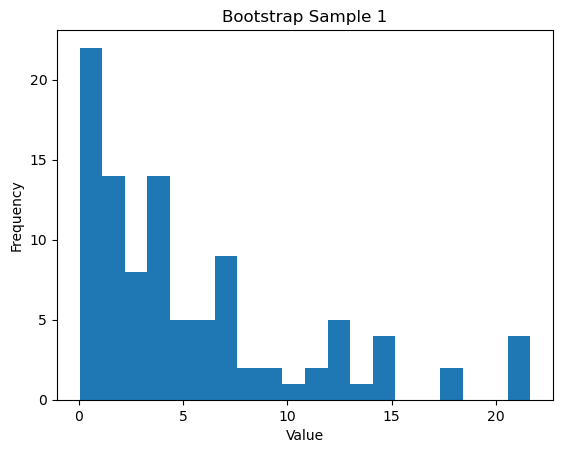

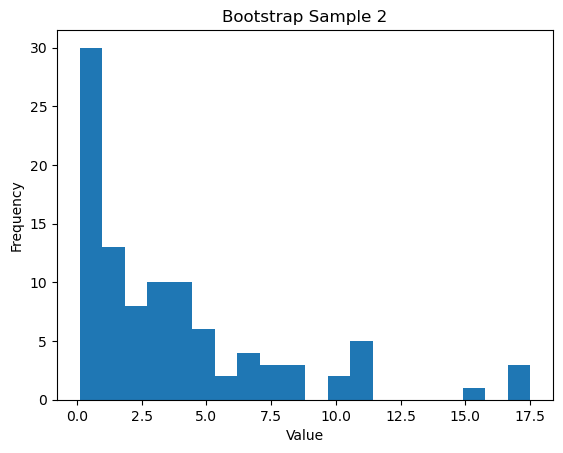

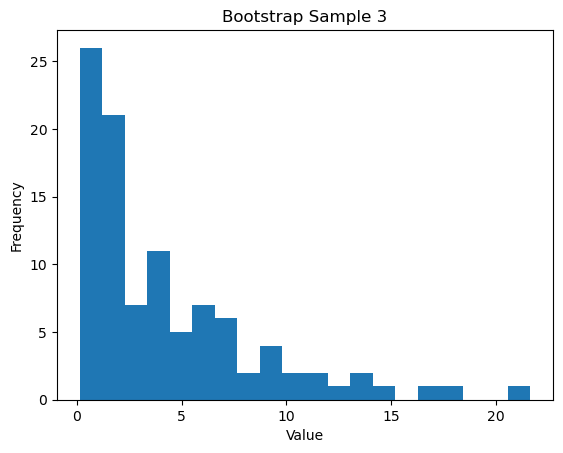

In [4]:
# ---------------------------------------------------
# 2. Generate and plot several bootstrap samples
# ---------------------------------------------------
n_boot_samples = 3
sample_size = len(data)

for i in range(1, n_boot_samples + 1):
    # Resample with replacement
    sample = np.random.choice(data, size=sample_size, replace=True)
    plt.figure()
    plt.hist(sample, bins=20)
    plt.title(f"Bootstrap Sample {i}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()


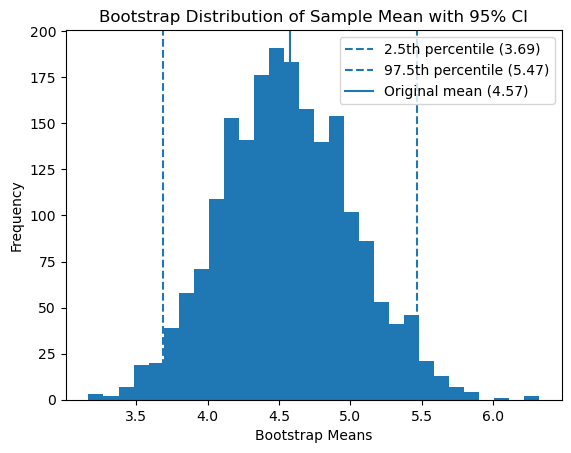

In [5]:

# ---------------------------------------------------
# 3. Build full bootstrap distribution of the mean
# ---------------------------------------------------
n_replicates = 2000
boots = []
for _ in range(n_replicates):
    # Resample and compute the statistic (mean)
    sample = np.random.choice(data, size=sample_size, replace=True)
    boots.append(np.mean(sample))

# Compute 95% CI bounds
lower = np.percentile(boots, 2.5)
upper = np.percentile(boots, 97.5)
obs_mean = np.mean(data)

# Plot the bootstrap distribution of means with CI
plt.figure()
plt.hist(boots, bins=30)
plt.axvline(lower, linestyle='--', label=f"2.5th percentile ({lower:.2f})")
plt.axvline(upper, linestyle='--', label=f"97.5th percentile ({upper:.2f})")
plt.axvline(obs_mean, linestyle='-', label=f"Original mean ({obs_mean:.2f})")
plt.title("Bootstrap Distribution of Sample Mean with 95% CI")
plt.xlabel("Bootstrap Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Example 2: Bootstrap CI for the MEDIAN of a skewed (Exponential) distribution

In [6]:
np.random.seed(1)
# Simulate 100 observations from an Exponential distribution (scale=5)
data2 = np.random.exponential(scale=5, size=100)

median2 = np.median(data2)
ci2 = bootstrap_ci(data2, np.median)
print(f"Example 2 - Sample median: {median2:.2f}")
print(f"Example 2 - 95% bootstrap CI for median: ({ci2[0]:.2f}, {ci2[1]:.2f})\n")

Example 2 - Sample median: 3.19
Example 2 - 95% bootstrap CI for median: (2.65, 4.42)



# Example 3: Bootstrap CI for a PROPORTION (Bernoulli data)

In [7]:

np.random.seed(2)
# Simulate 100 binary outcomes with p=0.3
data3 = np.random.binomial(n=1, p=0.3, size=100)

prop3 = np.mean(data3)
ci3 = bootstrap_ci(data3, np.mean)
print(f"Example 3 - Sample proportion: {prop3:.2f}")
print(f"Example 3 - 95% bootstrap CI for proportion: ({ci3[0]:.2f}, {ci3[1]:.2f})\n")

Example 3 - Sample proportion: 0.21
Example 3 - 95% bootstrap CI for proportion: (0.14, 0.29)



# Example 4: Bootstrap CI for the DIFFERENCE IN MEANS between two independent groups


In [8]:
np.random.seed(3)
# Group A: n=50, mean=5, sd=2; Group B: n=60, mean=7, sd=2.5
groupA = np.random.normal(loc=5, scale=2, size=50)
groupB = np.random.normal(loc=7, scale=2.5, size=60)

obs_diff = np.mean(groupA) - np.mean(groupB)

# Perform bootstrap: resample each group separately each replicate
boots_diff = []
for _ in range(2000):
    sampA = np.random.choice(groupA, size=len(groupA), replace=True)
    sampB = np.random.choice(groupB, size=len(groupB), replace=True)
    boots_diff.append(np.mean(sampA) - np.mean(sampB))

ci4_lower = np.percentile(boots_diff, 2.5)
ci4_upper = np.percentile(boots_diff, 97.5)
print(f"Example 4 - Observed mean difference (A - B): {obs_diff:.2f}")
print(f"Example 4 - 95% bootstrap CI for difference: ({ci4_lower:.2f}, {ci4_upper:.2f})\n")

Example 4 - Observed mean difference (A - B): -2.80
Example 4 - 95% bootstrap CI for difference: (-3.63, -1.97)



## On your own:

Below are five simulated data sets. In each one, you are asked to bootstrap a particular metric. Please generate 95% confidence intervals (two sided distribution) for each metric and interpret what the confidence interval tells you. 

In [9]:
import numpy as np

# Set a common sample size
n = 100


In [10]:
# 1. 100 draws from a Normal(μ=50, σ=10) distribution.
#    → Bootstrap the **sample mean**.
np.random.seed(0)
data1 = np.random.normal(loc=50, scale=10, size=n)

mean_1 = np.mean(data1)
print(f"Mean of data1: {mean_1:.2f}")

lower, upper = bootstrap_ci(data1, np.mean)
print(f"Question 1 - 95% bootstrap CI for difference: ({lower:.2f}, {upper:.2f})\n")

Mean of data1: 50.60
Question 1 - 95% bootstrap CI for difference: (48.62, 52.62)



In [11]:
# 2. 100 draws from an Exponential(scale=5) (skewed) distribution.
#    → Bootstrap the **sample median**.
np.random.seed(1)
data2 = np.random.exponential(scale=5, size=n)

median_2 = np.median(data2)
print(f"Median of data2: {median_2:.2f}")

lower, upper = bootstrap_ci(data2, np.median)
print(f"Question  - 95% bootstrap CI for difference: ({lower:.2f}, {upper:.2f})\n")

Median of data2: 3.19
Question  - 95% bootstrap CI for difference: (2.65, 4.42)



In [12]:
# 3. 100 draws from a Uniform(0, 100) distribution.
#    → Bootstrap the **90th percentile**.
np.random.seed(2)
data3 = np.random.uniform(low=0, high=100, size=n)

percentile_90 = np.percentile(data3, 90)
print(f"90th Percentile of data3: {percentile_90:.2f}")

lower, upper = bootstrap_ci(data3, lambda x: np.percentile(x, 90))
print(f"Question 3 - 95% bootstrap CI for difference: ({lower:.2f}, {upper:.2f})\n")

90th Percentile of data3: 84.70
Question 3 - 95% bootstrap CI for difference: (76.61, 95.37)



In [13]:
# 4. 100 Bernoulli trials with p=0.3 (0/1 data).
#    → Bootstrap the **sample proportion** (mean of the 0/1’s).
np.random.seed(3)
data4 = np.random.binomial(n=1, p=0.3, size=n)

prop_4 = np.mean(data4)
print(f"Sample proportion of data4: {prop_4:.2f}")

lower, upper = bootstrap_ci(data4, np.mean)
print(f"Question 4 - 95% bootstrap CI for difference: ({lower:.2f}, {upper:.2f})\n")

Sample proportion of data4: 0.21
Question 4 - 95% bootstrap CI for difference: (0.13, 0.30)



In [15]:
# 5. 100 draws from a heavy-tailed Student’s t (df=3).
#    → Bootstrap the **sample standard deviation**.
np.random.seed(4)
data5 = np.random.standard_t(df=3, size=n)

std_5 = np.std(data5)
print(f"Standard Deviation of data5: {std_5:.2f}")

lower, upper = bootstrap_ci(data5, np.std)
print(f"Question 5 - 95% bootstrap CI for difference: ({lower:.2f}, {upper:.2f})\n")

Standard Deviation of data5: 1.50
Question 5 - 95% bootstrap CI for difference: (1.16, 1.83)



<details>
<summary><strong>Instructor Solution</strong></summary>

```python
import numpy as np

# Bootstrap function
def bootstrap_ci(data, stat_func, n_boot=2000, alpha=0.05):
    boots = []
    n = len(data)
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)
        boots.append(stat_func(sample))
    lower = np.percentile(boots, 100 * alpha/2)
    upper = np.percentile(boots, 100 * (1 - alpha/2))
    return np.mean(data) if stat_func == np.mean else stat_func(data), lower, upper

# Simulations
n = 100
np.random.seed(0)
data1 = np.random.normal(loc=50, scale=10, size=n)
np.random.seed(1)
data2 = np.random.exponential(scale=5, size=n)
np.random.seed(2)
data3 = np.random.uniform(low=0, high=100, size=n)
np.random.seed(3)
data4 = np.random.binomial(n=1, p=0.3, size=n)
np.random.seed(4)
data5 = np.random.standard_t(df=3, size=n)

# Define statistics
stats = [
    ("normal", np.mean),
    ("exponential", np.median),
    ("uniform", lambda x: np.percentile(x, 90)),
    ("binomial", np.mean),
    ("t_df3", np.std),
]

datasets = {
    "normal": data1,
    "exponential": data2,
    "uniform": data3,
    "binomial": data4,
    "t_df3": data5,
}

# Compute bootstrap CIs
results = []
for name, func in stats:
    data = datasets[name]
    obs = func(data)
    _, lower, upper = bootstrap_ci(data, func)
    results.append({
        "dataset": name,
        "statistic": func.__name__ if hasattr(func, '__name__') else "percentile_90",
        "observed": obs,
        "ci_lower": lower,
        "ci_upper": upper
    })

results


## Finally: find a new data set out in the real world, load it in, generate a histrogram, calculate the sample mean, and generate a 95% (two sided) boostrap confidence interval. Once you finish you can continue the MLE lab from July 17th or move on to your project work once you've finished. 

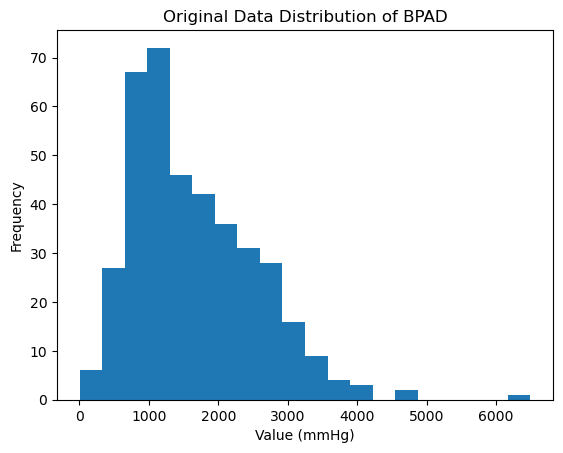

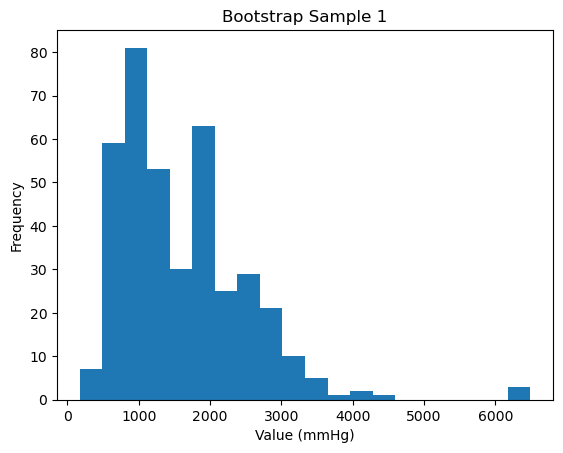

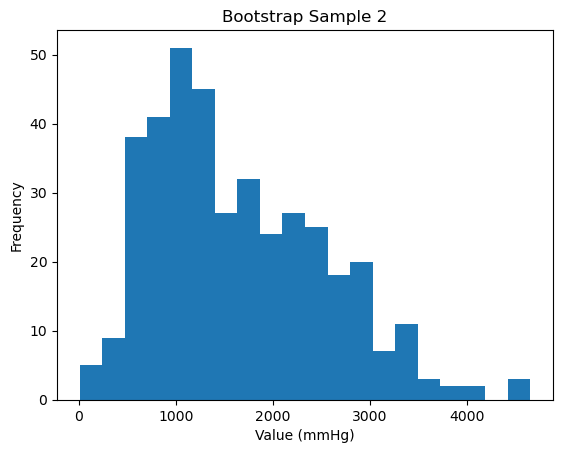

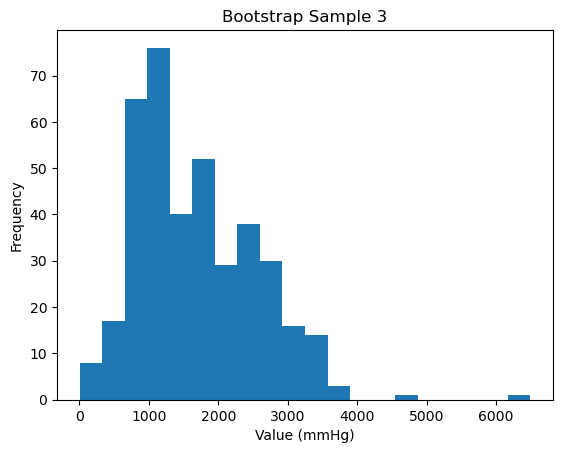

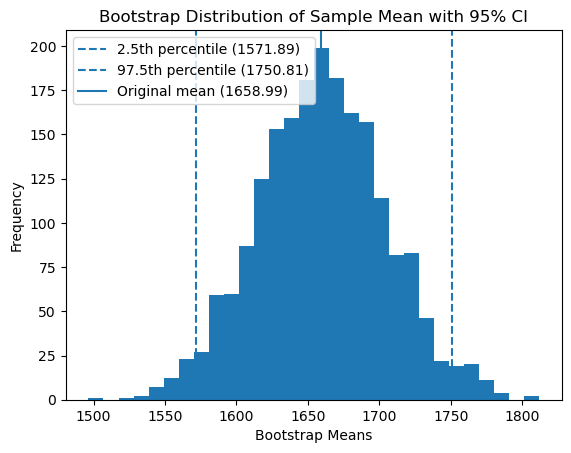

Mean of BPAD: 1658.99
95% bootstrap CI for difference: (1571.84, 1746.53)



In [30]:
import pandas as pd

df = pd.read_csv("diabetes_all_2016.csv")

df.head()

# Plot original data distribution
plt.figure()
plt.hist(df["BPAD"], bins = 20)
plt.title("Original Data Distribution of BPAD")
plt.xlabel("Value (mmHg)")
plt.ylabel("Frequency")
plt.show()

# Generate 3 Samples
n_boot_samples = 3
sample_size = len(df["BPAD"])

for i in range(1, n_boot_samples + 1):
    # Resample with replacement
    sample = np.random.choice(df["BPAD"], size=sample_size, replace=True)
    plt.figure()
    plt.hist(sample, bins=20)
    plt.title(f"Bootstrap Sample {i}")
    plt.xlabel("Value (mmHg)")
    plt.ylabel("Frequency")
    plt.show()

# Build full Bootstrap
n_replicates = 2000
boots = []
for _ in range(n_replicates):
    # Resample and compute the statistic (mean)
    sample = np.random.choice(df["BPAD"], size=sample_size, replace=True)
    boots.append(np.mean(sample))

# Compute 95% CI bounds
lower = np.percentile(boots, 2.5)
upper = np.percentile(boots, 97.5)
obs_mean = np.mean(df["BPAD"])

# Plot the bootstrap distribution of means with CI
plt.figure()
plt.hist(boots, bins=30)
plt.axvline(lower, linestyle='--', label=f"2.5th percentile ({lower:.2f})")
plt.axvline(upper, linestyle='--', label=f"97.5th percentile ({upper:.2f})")
plt.axvline(obs_mean, linestyle='-', label=f"Original mean ({obs_mean:.2f})")
plt.title("Bootstrap Distribution of Sample Mean with 95% CI")
plt.xlabel("Bootstrap Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#Check:
mean = np.mean(df["BPAD"])
print(f"Mean of BPAD: {mean:.2f}")
lower, upper = bootstrap_ci(df["BPAD"], np.mean)
print(f"95% bootstrap CI for difference: ({lower:.2f}, {upper:.2f})\n")
